In [58]:
import pandas as pd
import matplotlib
import numpy as np

matplotlib.rcParams.update({'font.size': 22})

In [83]:
df = pd.read_csv('data/UNSW_NB15_training-set.csv')

In [16]:
feat = pd.read_csv('data/UNSW_NB15_features.csv', encoding='cp1252')

In [102]:
feat.head(50)

,No.,Name,Type,Description
0,1,srcip,nominal,Source IP address
1,2,sport,integer,Source port number
2,3,dstip,nominal,Destination IP address
3,4,dsport,integer,Destination port number
4,5,proto,nominal,Transaction protocol
5,6,state,nominal,Indicates to the state and its dependent proto...
6,7,dur,Float,Record total duration
7,8,sbytes,Integer,Source to destination transaction bytes
8,9,dbytes,Integer,Destination to source transaction bytes
9,10,sttl,Integer,Source to destination time to live value


In [54]:
df.shape

(82332, 45)

In [33]:
df.sample(5).head().T

,36411,21166,10870,51978,41514
id,36412,21167,10871,51979,41515
dur,0.001013,0.000003,3.452266,0.548585,1.029907
proto,udp,udp,tcp,tcp,tcp
service,dns,dns,smtp,http,-
state,CON,INT,FIN,FIN,FIN
spkts,2,2,24,12,10
dpkts,2,0,22,6,6
sbytes,146,114,9260,3654,534
dbytes,178,0,1964,268,268
rate,2961.500406,333333.3215,13.034917,30.988817,14.564422


In [18]:
df['attack_cat'].value_counts()

Normal            37000
Generic           18871
Exploits          11132
Fuzzers            6062
DoS                4089
Reconnaissance     3496
Analysis            677
Backdoor            583
Shellcode           378
Worms                44
Name: attack_cat, dtype: int64

<AxesSubplot:title={'center':'Number of attacks by category'}>

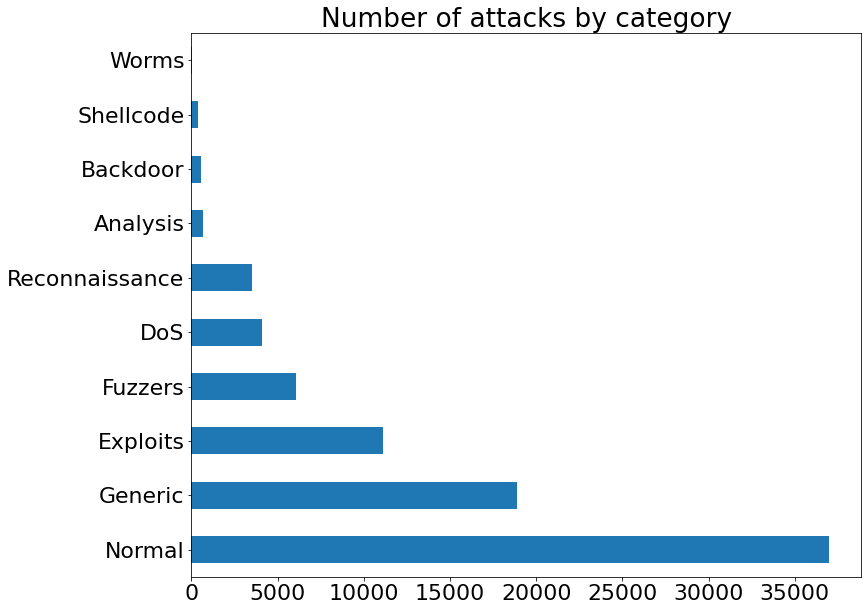

In [46]:
df['attack_cat'].value_counts().plot(kind='barh', title='Number of attacks by category', figsize=(12, 10))

In [26]:
df.isna().sum()

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

<AxesSubplot:title={'center':'Normal vs Malicious packet breakdown'}, ylabel='Benign or Malicious'>

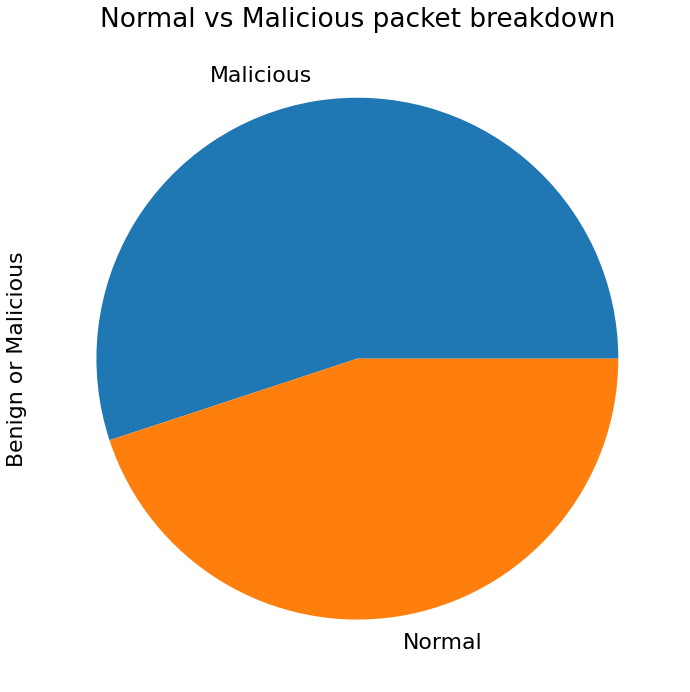

In [43]:
df['label'].value_counts().plot(
    kind='pie',
    title="Normal vs Malicious packet breakdown",
    figsize=(12, 12),
    ylabel='Benign or Malicious',
    labels=['Malicious', 'Normal']
)




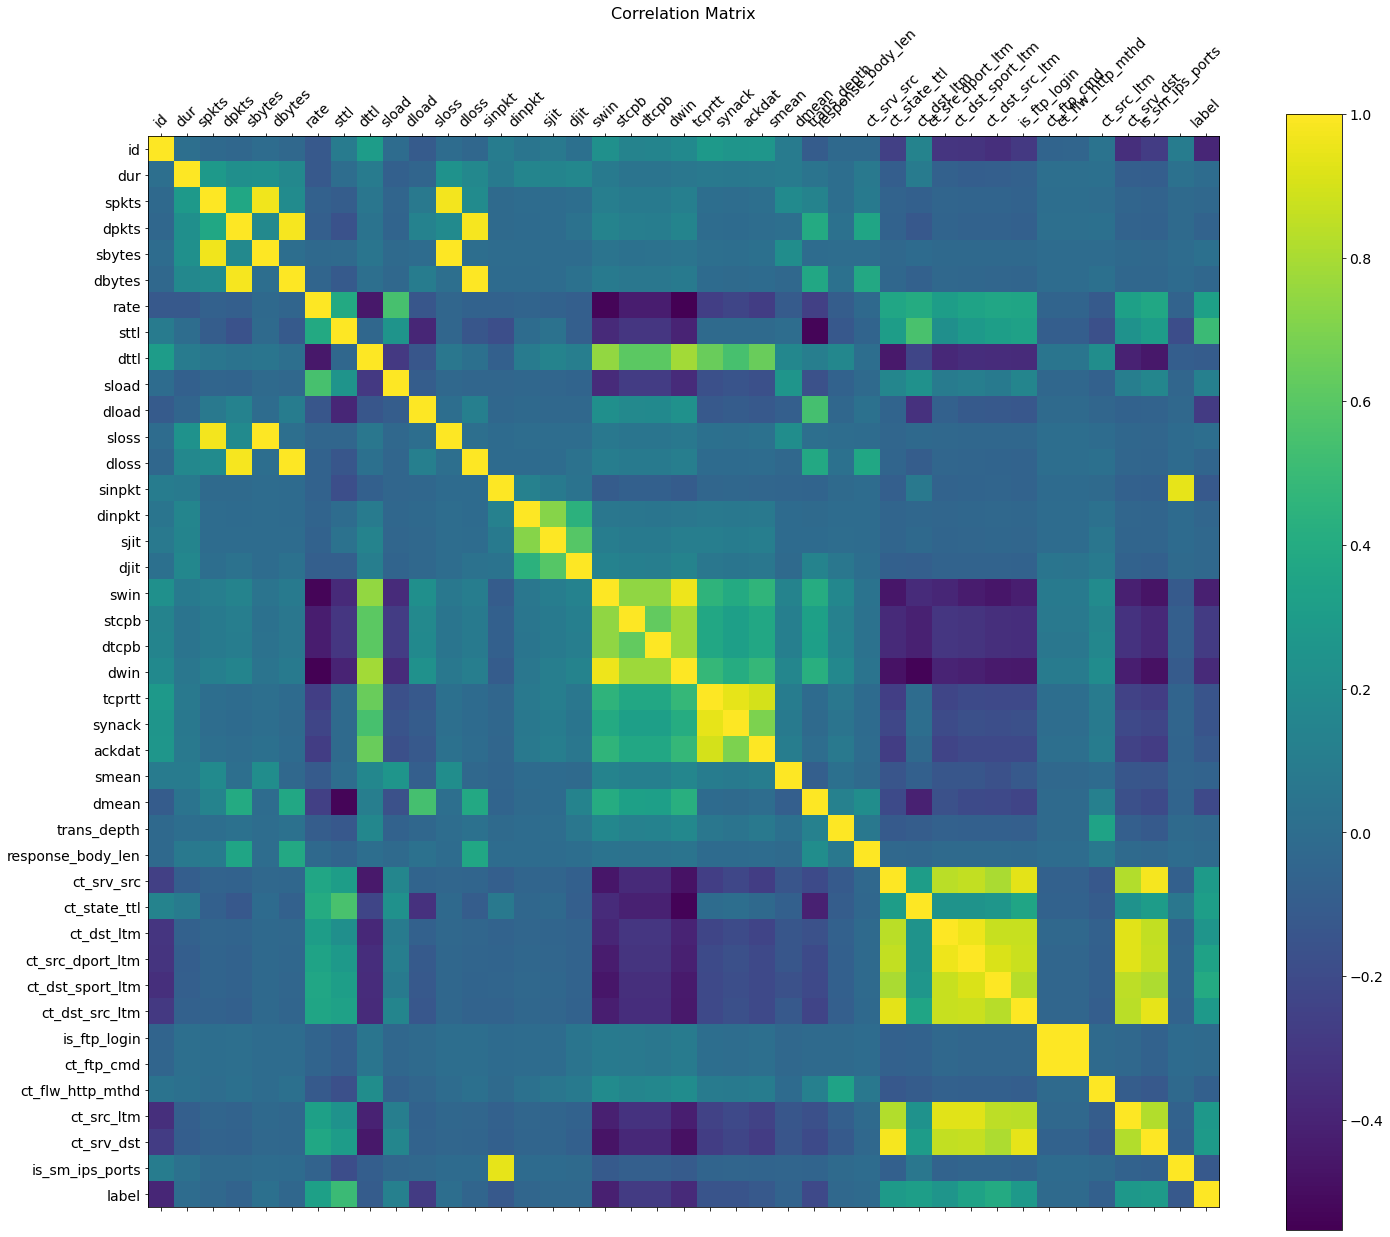

In [84]:
import matplotlib.pyplot as plt

f = plt.figure(figsize=(24, 20))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [51]:
df['proto'].value_counts()

tcp           43095
udp           29418
unas           3515
arp             987
ospf            676
              ...  
br-sat-mon       32
pvp              32
wsn              32
ib               31
igmp             30
Name: proto, Length: 131, dtype: int64

In [64]:
df['service'].value_counts()

none        47153
dns         21367
http         8287
smtp         1851
ftp          1552
ftp-data     1396
pop3          423
ssh           204
ssl            30
snmp           29
dhcp           26
radius          9
irc             5
Name: service, dtype: int64

In [85]:
df['service'] = df['service'].replace('-','none').apply(lambda x: x.strip().lower())



In [53]:
df['state'].value_counts()

FIN    39339
INT    34163
CON     6982
REQ     1842
ACC        4
RST        1
CLO        1
Name: state, dtype: int64

In [62]:
df['attack_cat'].value_counts()

Normal            37000
Generic           18871
Exploits          11132
Fuzzers            6062
DoS                4089
Reconnaissance     3496
Analysis            677
Backdoor            583
Shellcode           378
Worms                44
Name: attack_cat, dtype: int64

In [95]:
df['is_ftp_login'].value_counts()
df['is_sm_ips_ports'].value_counts()

0.0    81416
1.0      916
Name: is_sm_ips_ports, dtype: int64

In [86]:
df['is_ftp_login'] = np.where(df['is_ftp_login'] > 1, 1, df['is_ftp_login'])
df['is_sm_ips_ports'] = np.where(df['is_sm_ips_ports'] > 1, 1, df['is_sm_ips_ports'])

In [65]:
df['ct_flw_http_mthd'].value_counts()


0     74752
1      6908
4       478
9       126
16       32
2        18
12       12
6         6
Name: ct_flw_http_mthd, dtype: int64

In [87]:
# Identify columns with >95% correlation
# Credit: https://medium.com/@subrata.maji16/building-an-intrusion-detection-system-on-unsw-nb15-dataset-based-on-machine-learning-algorithm-16b1600996f5

corr = df.corr().abs()
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
columns_to_drop = [col for col in upper.columns if any(upper[col] > 0.95)]
print(columns_to_drop)


['sbytes', 'dbytes', 'sloss', 'dloss', 'dwin', 'ct_src_dport_ltm', 'ct_ftp_cmd', 'ct_srv_dst']


/var/folders/7r/72pw73153fq0wxt3j2p7tklh0000gn/T/ipykernel_38881/3197516954.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))


In [88]:
df.drop(columns_to_drop, axis=1, inplace=True, errors='ignore')

In [89]:
# Removing attack_cat for binary classification
df.drop(['attack_cat', 'id'], axis=1, inplace=True, errors='ignore')

In [90]:
df.head()

,dur,proto,service,state,spkts,dpkts,rate,sttl,dttl,sload,...,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_flw_http_mthd,ct_src_ltm,is_sm_ips_ports,label
0,0.000011,udp,none,INT,2,0,90909.0902,254,0,180363632.0,...,2,2,1,1,2,0,0,1,0,0
1,0.000008,udp,none,INT,2,0,125000.0003,254,0,881000000.0,...,2,2,1,1,2,0,0,1,0,0
2,0.000005,udp,none,INT,2,0,200000.0051,254,0,854400000.0,...,3,2,1,1,3,0,0,1,0,0
3,0.000006,udp,none,INT,2,0,166666.6608,254,0,600000000.0,...,3,2,2,1,3,0,0,2,0,0
4,0.000010,udp,none,INT,2,0,100000.0025,254,0,850400000.0,...,3,2,2,1,3,0,0,2,0,0


In [73]:
df.shape

(82332, 36)

In [91]:
num_col = [col for col in df.columns if col not in ['label', 'proto', 'service', 'state']]
num_col

['dur',
 'spkts',
 'dpkts',
 'rate',
 'sttl',
 'dttl',
 'sload',
 'dload',
 'sinpkt',
 'dinpkt',
 'sjit',
 'djit',
 'swin',
 'stcpb',
 'dtcpb',
 'tcprtt',
 'synack',
 'ackdat',
 'smean',
 'dmean',
 'trans_depth',
 'response_body_len',
 'ct_srv_src',
 'ct_state_ttl',
 'ct_dst_ltm',
 'ct_dst_sport_ltm',
 'ct_dst_src_ltm',
 'is_ftp_login',
 'ct_flw_http_mthd',
 'ct_src_ltm',
 'is_sm_ips_ports']

In [92]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler = scaler.fit(df[num_col])
df[num_col] = scaler.transform(df[num_col])

In [93]:
df.head()

,dur,proto,service,state,spkts,dpkts,rate,sttl,dttl,sload,...,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_flw_http_mthd,ct_src_ltm,is_sm_ips_ports,label
0,1.833334e-07,udp,none,INT,0.000094,0.0,0.090909,0.996078,0.0,0.034238,...,0.016129,0.333333,0.000000,0.0,0.016129,0.0,0.0,0.000000,0.0,0
1,1.333334e-07,udp,none,INT,0.000094,0.0,0.125000,0.996078,0.0,0.167236,...,0.016129,0.333333,0.000000,0.0,0.016129,0.0,0.0,0.000000,0.0,0
2,8.333335e-08,udp,none,INT,0.000094,0.0,0.200000,0.996078,0.0,0.162187,...,0.032258,0.333333,0.000000,0.0,0.032258,0.0,0.0,0.000000,0.0,0
3,1.000000e-07,udp,none,INT,0.000094,0.0,0.166667,0.996078,0.0,0.113895,...,0.032258,0.333333,0.017241,0.0,0.032258,0.0,0.0,0.016949,0.0,0
4,1.666667e-07,udp,none,INT,0.000094,0.0,0.100000,0.996078,0.0,0.161427,...,0.032258,0.333333,0.017241,0.0,0.032258,0.0,0.0,0.016949,0.0,0


In [100]:
cat_col = ['proto', 'service', 'state']
ohe_df = pd.get_dummies(df[cat_col], drop_first = True)
df = pd.concat([df, ohe_df], axis = 1)

In [101]:
df.head()

,dur,proto,service,state,spkts,dpkts,rate,sttl,dttl,sload,...,service_smtp,service_snmp,service_ssh,service_ssl,state_CLO,state_CON,state_FIN,state_INT,state_REQ,state_RST
0,1.833334e-07,udp,none,INT,0.000094,0.0,0.090909,0.996078,0.0,0.034238,...,0,0,0,0,0,0,0,1,0,0
1,1.333334e-07,udp,none,INT,0.000094,0.0,0.125000,0.996078,0.0,0.167236,...,0,0,0,0,0,0,0,1,0,0
2,8.333335e-08,udp,none,INT,0.000094,0.0,0.200000,0.996078,0.0,0.162187,...,0,0,0,0,0,0,0,1,0,0
3,1.000000e-07,udp,none,INT,0.000094,0.0,0.166667,0.996078,0.0,0.113895,...,0,0,0,0,0,0,0,1,0,0
4,1.666667e-07,udp,none,INT,0.000094,0.0,0.100000,0.996078,0.0,0.161427,...,0,0,0,0,0,0,0,1,0,0
